# Expanded Analysis:

## 1. Basic Metrics
    - What is the average score per user per post per subreddit?
    - What is the average number of posts per user per day?
    - What is the average number of comments per user per day?
    - What is the average score per user per day?
    - What is the correlation between number of comments and post score?
    - What were the total number of posts per day per subreddit?
    - What were the total number of comments per day per subreddit?

## 2. Engagement Patterns Analysis

Engagement per user can reveal whether a core group of users drives conversation depth on particular posts. Posts with exceptionally high engagement per user might suggest an active, concentrated effort to increase visibility or prominence.

## 3. Temporal Analysis

Temporal patterns can be telling in coordinated behavior detection. By examining timestamps for posting and commenting activity, you can identify bursts of comments occurring in quick succession, potentially indicating that users were mobilized to interact with specific posts at particular times. Identifying multiple posts with similar surges from the same user sets can further strengthen indications of coordination.

## 4. Network Analysis of User Interactions

Construct a network graph where nodes represent users and edges represent interactions (like replies or comments on others’ posts). Community detection methods such as modularity-based clustering can help reveal tightly-knit user groups interacting disproportionately with specific posts. High interconnectedness in a subset of users around certain posts is another potential indicator of coordination.

## 5. Sentiment and Content Similarity Analysis

By analyzing the text of posts and comments for sentiment and similarity, we can uncover coordinated messaging. Cosine similarity on text vectors or topic modeling can highlight phrases or sentiments repeatedly used by multiple users, suggesting a coordinated narrative. Visualizations such as word clouds or similarity matrices can expose consistent language patterns and sentiment alignment across user-generated content.

## 6. Anomaly Detection and Statistical Analysis

Using anomaly detection techniques (e.g., z-scores, IQR-based outlier detection), flag posts or user interactions that statistically deviate from typical engagement norms. Posts or users with highly unusual activity levels might warrant further investigation as possible examples of coordinated behavior.

## 7. Machine Learning for Behavior Pattern Recognition

Machine learning models, such as clustering algorithms, can be useful in identifying similarities among engagement patterns. You could also use supervised learning if labeled data on known coordinated activities exists, which would help in training a model to detect such behavior based on interaction features.

By combining these methods, the analysis will provide insight into whether interactions reflect organic engagement or are likely the result of organized, coordinated efforts.

## 8. Visualization of Coordinated Behavior
- Network graph: Display user clusters with connections representing comments/upvotes, highlighting clusters with distinct colors.
- Engagement heatmap or time-series plot: Show spikes in engagement levels for posts over time.
- Temporal density plot: Map user posting activity over time to detect dense, coordinated posting periods.
- Content similarity matrix: Represent similarity scores among user posts, highlighting unusually similar content between users.


In [13]:
import psycopg2
import pandas as pd
from db_config import db_params

def fetch_data_as_df(query):
    """Executes a SQL query and returns the results as a Pandas DataFrame."""
    try:
        # Establish connection
        conn = psycopg2.connect(**db_params)
        
        # Use Pandas to read SQL query results directly into a DataFrame
        df = pd.read_sql_query(query, conn)
        return df
    
    except Exception as e:
        print("Error:", e)
    
    finally:
        conn.close()

# Set the filter parameters
utc_filter_date = '2024-10-15'

# SQL queries to retrieve data related to r/politics with UTC and author filters
posts_query = f"""
SELECT * 
FROM posts 
WHERE subreddit = 'politics'
AND created_utc > '{utc_filter_date}'
AND author NOT LIKE 'Moderator%'
AND author != 'None';
"""

comments_query = f"""
SELECT * 
FROM comments 
WHERE post_id IN (
    SELECT post_id 
    FROM posts 
    WHERE subreddit = 'politics'
    AND created_utc > '{utc_filter_date}'
    AND author NOT LIKE 'Moderator%'
    AND author != 'None'
)
AND created_utc > '{utc_filter_date}'
AND author NOT LIKE 'Moderator%'
AND author != 'None';
"""

# Fetch filtered posts and comments as DataFrames
posts_df = fetch_data_as_df(posts_query)
comments_df = fetch_data_as_df(comments_query)

/var/folders/y4/mfl699z170q3dxfrxlvx6xqr0000gn/T/ipykernel_33746/1053834299.py:12: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  df = pd.read_sql_query(query, conn)


In [14]:
posts_df.head()

,post_id,subreddit,author,title,self_text,url,created_utc,score,num_comments,flair
0,1gbthc0,politics,PoliticsModeratorBot,"/r/Politics' 2024 US Elections Live Thread, Pa...",,https://www.reddit.com/live/1db9knzhqzdfp/,2024-10-25 08:50:46,121,8517,None
1,1gbqywl,politics,LeanderthalTX,101 More Reasons Trump Is Unfit to Be President,,https://www.thebulwark.com/p/101-more-reasons-...,2024-10-25 06:21:53,717,48,None
2,1gcba5y,politics,Rlynn11,Watch supporters leave Trump rally in Traverse...,,https://www.freep.com/videos/news/politics/ele...,2024-10-25 22:38:06,11,5,Soft Paywall
3,1gcb9cl,politics,InternetPopular3679,Beyoncé and Kelly Rowland Just Publicly Endors...,,https://www.vogue.com/article/beyonce-kelly-ro...,2024-10-25 22:36:41,25,4,None
4,1gcb7vr,politics,Rlynn11,Kamala Harris breaks her own rally crowd recor...,,https://www.newsweek.com/kamala-harris-breaks-...,2024-10-25 22:34:21,39,6,None


In [15]:
comments_df.head()

,comment_id,post_id,parent_id,author,body,created_utc,score
0,ltr7848,1gbthc0,t3_1gbthc0,dinkidonut,"John Fetterman - \n\n""My prediction on what’s ...",2024-10-25 17:58:24,1
1,ltpjsr1,1gbthc0,t3_1gbthc0,RAG319,\+2 Kamala +2 Allred +2 Post-Voting Bánh Mì Sa...,2024-10-25 12:46:41,45
2,ltr87ee,1gbthc0,t3_1gbthc0,stupidlyboredtho,why the hell is the talking point “She’s going...,2024-10-25 18:04:12,1
3,ltpndnr,1gbthc0,t3_1gbthc0,blues111,https://x.com/NewsWire_US/status/1849857598679...,2024-10-25 13:04:39,48
4,ltppu5r,1gbthc0,t3_1gbthc0,GhostFish,"So much for ""Democracy Dies In Darkness"". Fuck...",2024-10-25 13:17:03,45


What is the average score per post, per comment, per subreddit?

In [18]:
import psycopg2
import pandas as pd
from db_config import db_params

def fetch_data_as_df(query):
    """Executes a SQL query and returns the results as a Pandas DataFrame."""
    try:
        # Establish connection
        conn = psycopg2.connect(**db_params)
        
        # Use Pandas to read SQL query results directly into a DataFrame
        df = pd.read_sql_query(query, conn)
        return df
    
    except Exception as e:
        print("Error:", e)
    
    finally:
        conn.close()

# SQL query for average score per post, per subreddit
avg_post_score_query = """
SELECT subreddit, AVG(score) AS avg_score_per_post
FROM posts
GROUP BY subreddit;
"""

# SQL query for average score per comment, per subreddit
avg_comment_score_query = """
SELECT p.subreddit, AVG(c.score) AS avg_score_per_comment
FROM comments c
JOIN posts p ON c.post_id = p.post_id
GROUP BY p.subreddit;
"""

# Fetch average score per post and per comment as DataFrames
avg_post_score_df = fetch_data_as_df(avg_post_score_query)
avg_comment_score_df = fetch_data_as_df(avg_comment_score_query)

# Sort the DataFrames by average score in descending order
avg_post_score_df = avg_post_score_df.sort_values(by="avg_score_per_post", ascending=False)
avg_comment_score_df = avg_comment_score_df.sort_values(by="avg_score_per_comment", ascending=False)

# Display sorted results
print("Average Score per Post, per Subreddit (sorted by score descending):")
print(avg_post_score_df)

print("\nAverage Score per Comment, per Subreddit (sorted by score descending):")
print(avg_comment_score_df)

/var/folders/y4/mfl699z170q3dxfrxlvx6xqr0000gn/T/ipykernel_33746/494073133.py:12: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  df = pd.read_sql_query(query, conn)


Average Score per Post, per Subreddit (sorted by score descending):
      subreddit  avg_score_per_post
1          news        14040.805517
7     worldnews         7202.489130
6     inthenews         5952.800402
4    technology         5907.132378
2      politics         5899.736881
5     democrats         1118.656554
0    conspiracy          519.454452
3  conservative          327.994284

Average Score per Comment, per Subreddit (sorted by score descending):
      subreddit  avg_score_per_comment
4          news              94.297150
7     worldnews              60.979569
5      politics              45.845427
6    technology              42.012468
0  conservative              31.825321
3     inthenews              19.165205
1    conspiracy              13.134332
2     democrats              12.748216


/var/folders/y4/mfl699z170q3dxfrxlvx6xqr0000gn/T/ipykernel_33746/3124950773.py:11: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  df = pd.read_sql_query(query, conn)



Average Score per Post per Subreddit (DataFrame):
      subreddit  avg_score_per_post
0  conservative          260.271589
1    conspiracy          121.176550
2     democrats          486.635792
3     inthenews         1029.493654
4          news         5008.420949
5      politics         1967.738956
6    technology         1328.441090
7     worldnews         2095.653846

Average Number of Posts per User per Day (DataFrame):
                   author  avg_posts_per_day
0                   -503-           2.000000
1                  -5677-           1.000000
2     -AdonaitheBestower-           1.333333
3                  -Art--           1.000000
4                -Ninety-           1.000000
...                   ...                ...
6323         zphotoreddit           1.000000
6324               zroxx2           2.571429
6325             zsreport           2.666667
6326           zurgejoint           1.000000
6327              zxyzyxz           1.000000

[6328 rows x 2 columns]

Aver

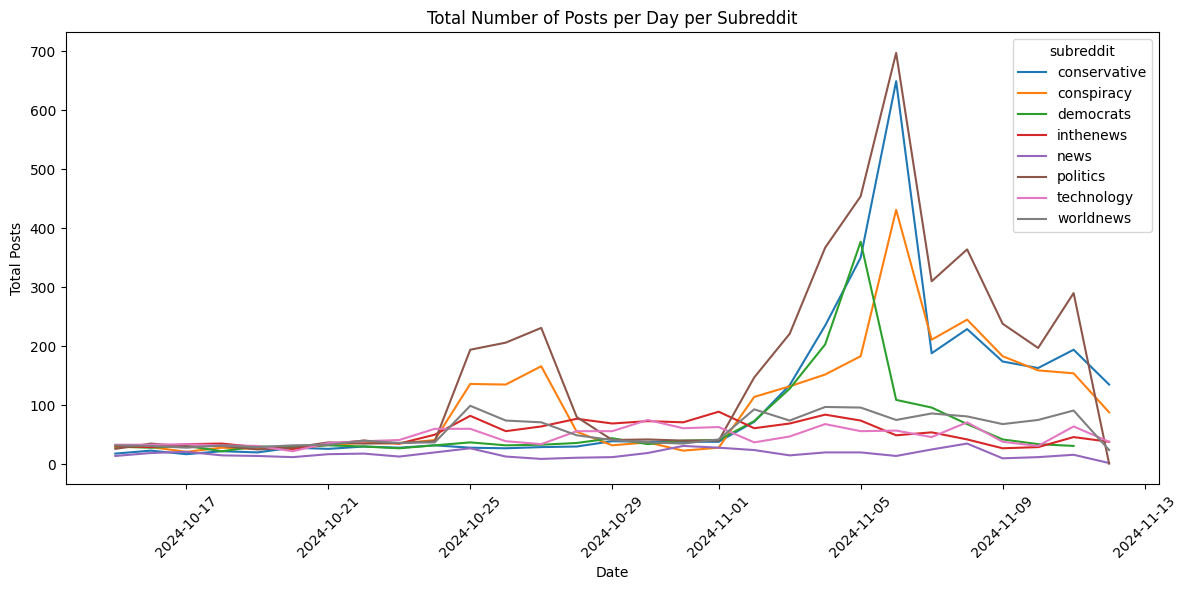

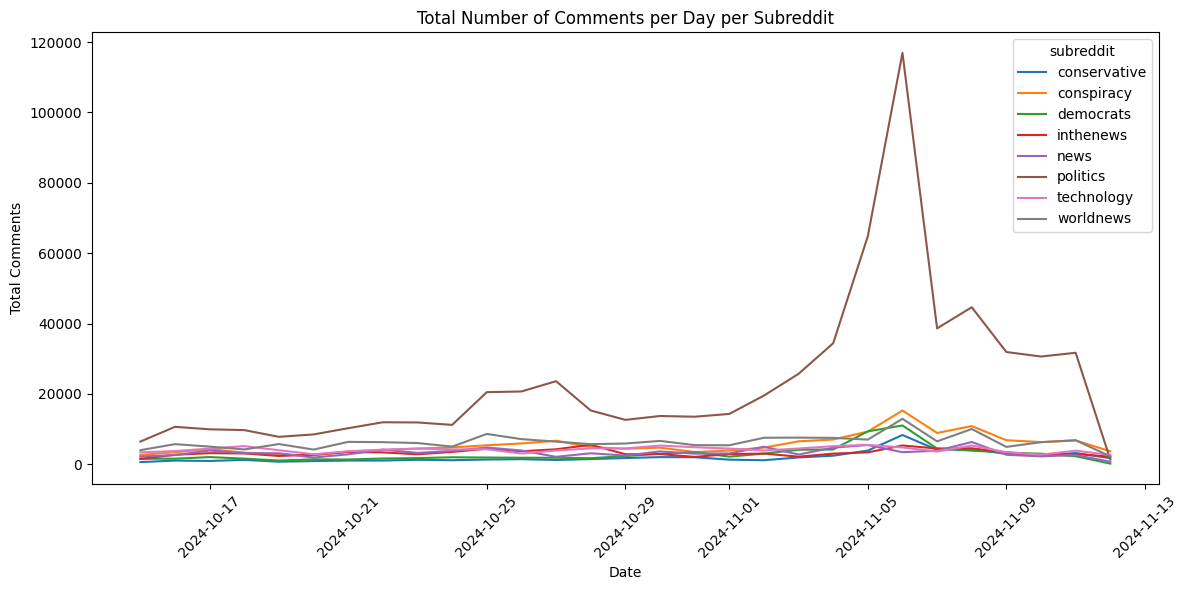

In [19]:
import psycopg2
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from db_config import db_params

def fetch_data_as_df(query):
    """Executes a SQL query and returns the results as a Pandas DataFrame."""
    try:
        conn = psycopg2.connect(**db_params)
        df = pd.read_sql_query(query, conn)
        return df
    except Exception as e:
        print("Error:", e)
    finally:
        conn.close()

# Set filter parameters
utc_filter_date = '2024-10-15'

# SQL queries to filter data by UTC date and exclude certain authors
posts_query = f"""
SELECT * FROM posts
WHERE created_utc > '{utc_filter_date}'
AND author NOT LIKE 'Moderator%'
AND author != 'None';
"""

comments_query = f"""
SELECT * FROM comments
WHERE created_utc > '{utc_filter_date}'
AND author NOT LIKE 'Moderator%'
AND author != 'None';
"""

# Fetch data
posts_df = fetch_data_as_df(posts_query)
comments_df = fetch_data_as_df(comments_query)

# Convert created_utc to datetime for time series
posts_df['created_utc'] = pd.to_datetime(posts_df['created_utc'])
comments_df['created_utc'] = pd.to_datetime(comments_df['created_utc'])

# 1. Average score per post per subreddit
avg_score_per_post_subreddit = posts_df.groupby('subreddit')['score'].mean().reset_index(name='avg_score_per_post')
print("\nAverage Score per Post per Subreddit (DataFrame):")
print(avg_score_per_post_subreddit)

# 2. Average number of posts per user per day
posts_df['date'] = posts_df['created_utc'].dt.date
avg_posts_per_user_per_day = posts_df.groupby(['author', 'date']).size().groupby(level=0).mean().reset_index(name='avg_posts_per_day')
print("\nAverage Number of Posts per User per Day (DataFrame):")
print(avg_posts_per_user_per_day)

# 3. Average number of comments per user per day
comments_df['date'] = comments_df['created_utc'].dt.date
avg_comments_per_user_per_day = comments_df.groupby(['author', 'date']).size().groupby(level=0).mean().reset_index(name='avg_comments_per_day')
print("\nAverage Number of Comments per User per Day (DataFrame):")
print(avg_comments_per_user_per_day)

# 4. Correlation between number of comments and post score
correlation_comments_score = posts_df[['num_comments', 'score']].corr().iloc[0, 1]
print("\nCorrelation between Number of Comments and Post Score:", correlation_comments_score)

# 5. Total number of posts per day per subreddit (time series)
total_posts_per_day_subreddit = posts_df.groupby([posts_df['created_utc'].dt.date, 'subreddit']).size().reset_index(name='total_posts')
total_posts_per_day_subreddit.rename(columns={'created_utc': 'date'}, inplace=True)
print("\nTotal Number of Posts per Day per Subreddit (Time Series):")
print(total_posts_per_day_subreddit)

# 6. Total number of comments per day per subreddit (time series)
comments_df = comments_df.merge(posts_df[['post_id', 'subreddit']], on='post_id')
total_comments_per_day_subreddit = comments_df.groupby([comments_df['created_utc'].dt.date, 'subreddit']).size().reset_index(name='total_comments')
total_comments_per_day_subreddit.rename(columns={'created_utc': 'date'}, inplace=True)
print("\nTotal Number of Comments per Day per Subreddit (Time Series):")
print(total_comments_per_day_subreddit)

# Plotting the time series for total number of posts per day per subreddit
plt.figure(figsize=(12, 6))
sns.lineplot(data=total_posts_per_day_subreddit, x='date', y='total_posts', hue='subreddit')
plt.title('Total Number of Posts per Day per Subreddit')
plt.xlabel('Date')
plt.ylabel('Total Posts')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

# Plotting the time series for total number of comments per day per subreddit
plt.figure(figsize=(12, 6))
sns.lineplot(data=total_comments_per_day_subreddit, x='date', y='total_comments', hue='subreddit')
plt.title('Total Number of Comments per Day per Subreddit')
plt.xlabel('Date')
plt.ylabel('Total Comments')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()